<a href="https://colab.research.google.com/github/soniya1993/Bike-Sharing-Demand-Prediction-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data understanding

In [91]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
#importing the data
df=pd.read_csv('/content/drive/MyDrive/python data/SeoulBikeData.csv',encoding = 'unicode_escape')


In [93]:
#applying function to see the first 5 rows of data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [94]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [96]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [97]:
#checking the size of data
df.shape

(8760, 14)

#Data preprocessing

In [98]:
#checking null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [99]:
#checking duplicate values and keeping first value
df.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool

In [100]:
# splitting the date in month year day format
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['day'] = pd.to_datetime(df['Date']).dt.day_name()


In [101]:
#now we can drop date as we have year month and day
df.drop(columns='Date',inplace=True)

In [102]:
# with day column we will find out weekdays and weekends
df['day'] = df['day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)


1=weekends
0= weekdays

In [103]:
df['day'].value_counts()

0    6216
1    2544
Name: day, dtype: int64

#Exploratory data analysis

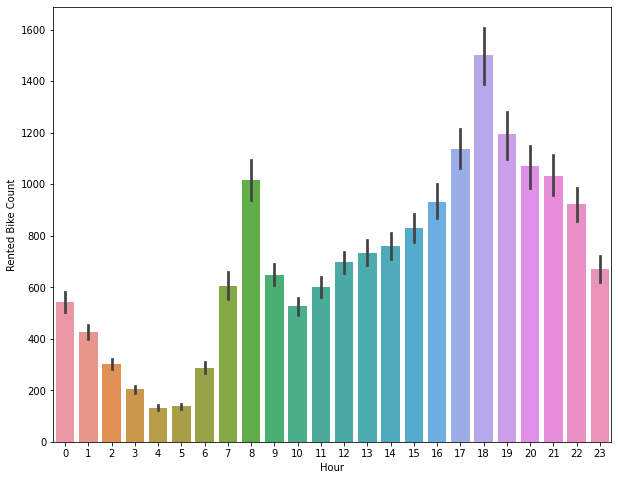

In [104]:
#graph to find relation between hours and count of bike
plt.figure(figsize=(10,8)) 
sns.barplot(x="Hour", y="Rented Bike Count",data=df)

**Observation-**

1) bike is rented out for 18 hours mostly

2) people are rented bike for hours ranging 10 to 24 the most

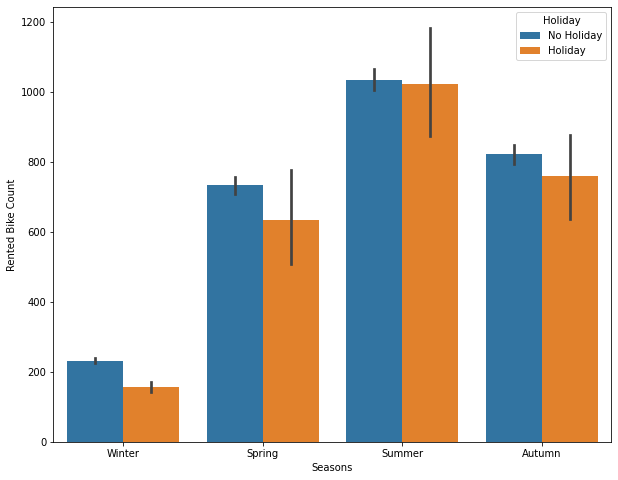

In [105]:
plt.figure(figsize=(10,8)) 
sns.barplot(x="Seasons", y="Rented Bike Count",hue='Holiday',data=df)

**observation**

1) People are using bike on holidays as well as no holiday equally

2) people are using bike mostly in summer season and autumn

[Text(0.5, 1.0, 'Count of bikes during different months')]

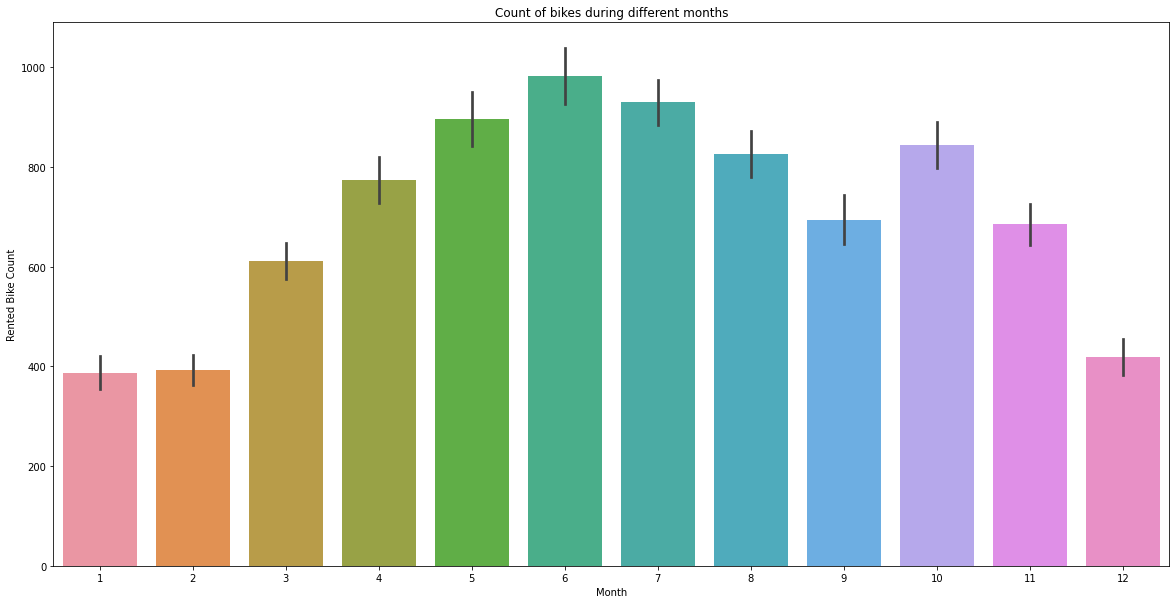

In [106]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='Month', y='Rented Bike Count',ax=ax)
ax.set(title='Count of bikes during different months')

**Observation**

1) Jan, Feb December months have very less count might be because of winter season


[Text(0.5, 1.0, 'Count of bikes during different days')]

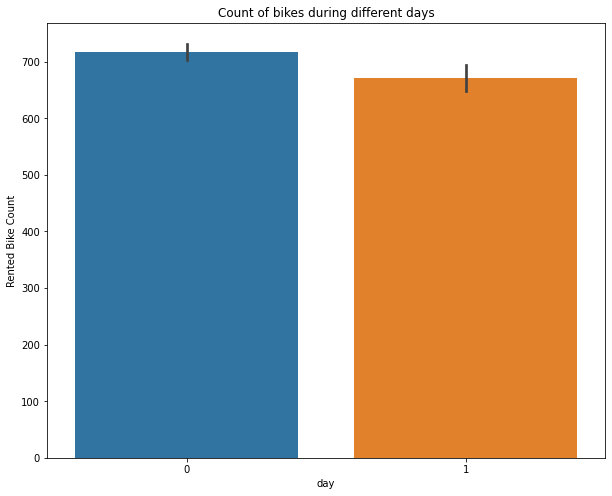

In [107]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=df, x='day', y='Rented Bike Count', ax=ax)
ax.set(title='Count of bikes during different days')

**Observation-**

1) weekdays and weekends in both people are using bike almost equally

[Text(0.5, 1.0, 'Relation between wind speed and users')]

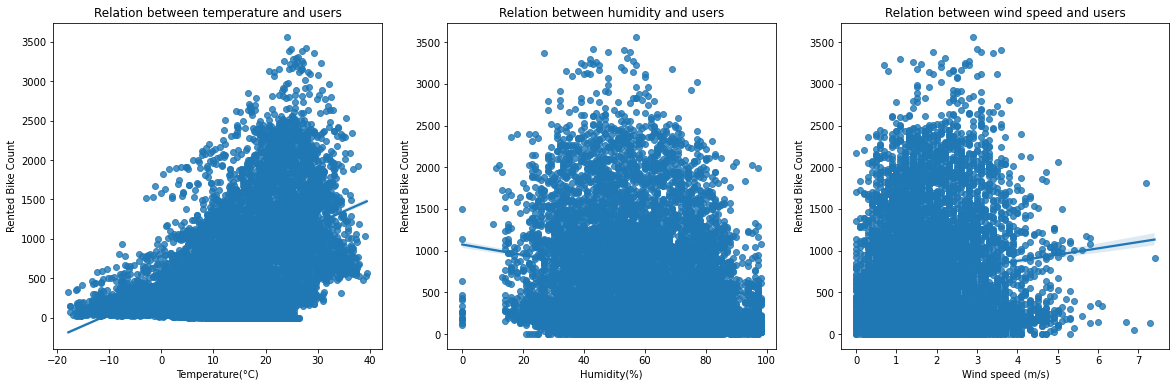

In [108]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,6))
sns.regplot(x=df['Temperature(°C)'], y=df['Rented Bike Count'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df['Humidity(%)'], y=df['Rented Bike Count'], ax=ax2)
ax2.set(title="Relation between humidity and users")
sns.regplot(x=df['Wind speed (m/s)'], y=df['Rented Bike Count'], ax=ax3)
ax3.set(title="Relation between wind speed and users")

[Text(0.5, 1.0, 'Relation between rainfall and users')]

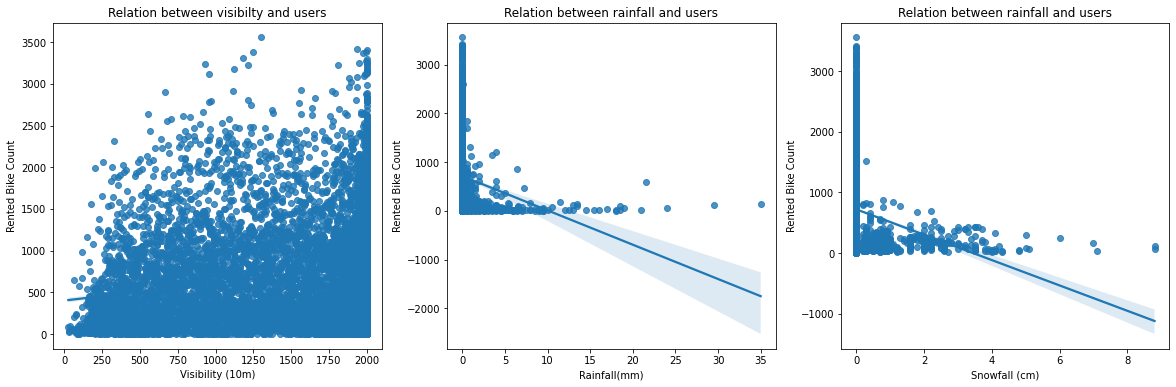

In [109]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,6))
sns.regplot(x=df['Visibility (10m)'], y=df['Rented Bike Count'], ax=ax1)
ax1.set(title="Relation between visibilty and users")
sns.regplot(x=df['Rainfall(mm)'], y=df['Rented Bike Count'], ax=ax2)
ax2.set(title="Relation between rainfall and users")
sns.regplot(x=df['Snowfall (cm)'], y=df['Rented Bike Count'], ax=ax3)
ax3.set(title="Relation between rainfall and users")

**Observation**

1) As the temperature and humidity increases users are increasing vice versa with wind speed

2)Visibility increases user are incresing

3) rain and snow increasing user are decreasing

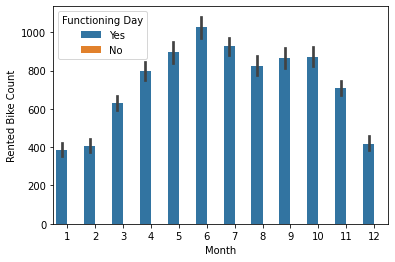

In [110]:
#graph for functioning days
sns.barplot(x='Month', y='Rented Bike Count',hue='Functioning Day',data=df)

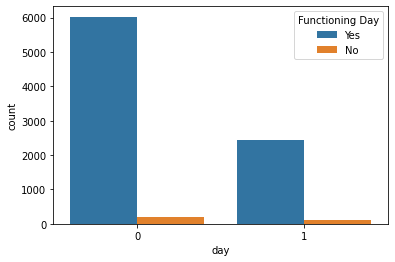

In [111]:
sns.countplot(x='day',hue='Functioning Day',data=df)

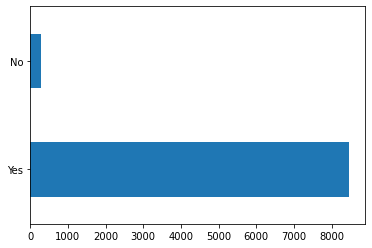

In [112]:
df['Functioning Day'].value_counts().plot(kind='barh')

**Observation**
1) functioning days are very much as compared to non functioning days no people can rent a bike on non functioning days

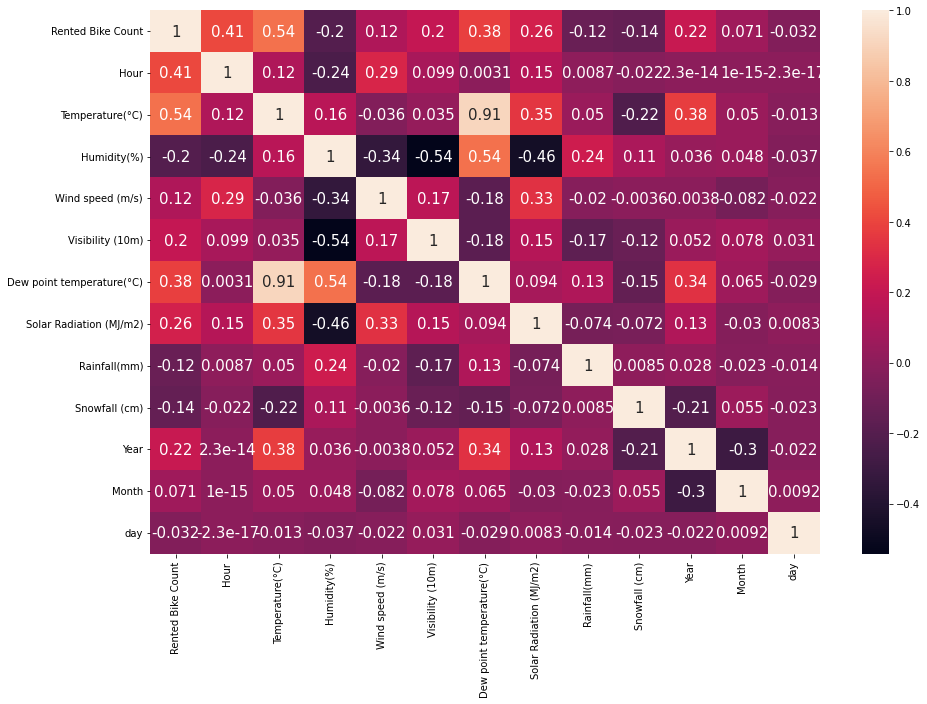

In [113]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

Observation-We see that there is a hyper correlation between columns 'Temperature(°C)' and 'Dew point temperature(°C)' so we can drop the column 'Dew point temperature(°C)'. And they have the same variations.

In [114]:
df=df.drop(['Dew point temperature(°C)'],axis=1)

**Conclusion**

1) Bike is rented out for 18 hours mostly 

2) people are rented bike for hours ranging 10 to 24 the most might be because people are renting bikes for office work

3) As the temperature and humidity increases users are increasing 

4) people are prefering to ride bike when its little windy but not too much windy

5) Visibility increases user are incresing

6) rain and snow increasing user are decreasing
 
7) functioning days are very much as compared to non functioning days no people can rent a bike on non functioning days
 
8) weekdays and weekends in both people are using bike almost equally

# One hot encoding

In [115]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,day
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,0


In [116]:
df.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [117]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Holiday', 'Functioning Day','Seasons'])

In [118]:
one_hot_encoded_data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,day,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,2017,1,0,0,1,0,1,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,2017,1,0,0,1,0,1,0,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,2017,1,0,0,1,0,1,0,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,2017,1,0,0,1,0,1,0,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,2017,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,2018,11,0,0,1,0,1,1,0,0,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,2018,11,0,0,1,0,1,1,0,0,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,2018,11,0,0,1,0,1,1,0,0,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,2018,11,0,0,1,0,1,1,0,0,0


In [119]:
one_hot_encoded_data.shape

(8760, 20)

In [120]:
one_hot_encoded_data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,day,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,2017,1,0,0,1,0,1,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,2017,1,0,0,1,0,1,0,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,2017,1,0,0,1,0,1,0,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,2017,1,0,0,1,0,1,0,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,2017,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,2018,11,0,0,1,0,1,1,0,0,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,2018,11,0,0,1,0,1,1,0,0,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,2018,11,0,0,1,0,1,1,0,0,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,2018,11,0,0,1,0,1,1,0,0,0


In [121]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Year                     8760 non-null   int64  
 10  Month                    8760 non-null   int64  
 11  day                      8760 non-null   int64  
 12  Holiday_Holiday          8760 non-null   uint8  
 13  Holiday_No Holiday       8760 non-null   uint8  
 14  Functioning Day_No      

#Input Split

In [123]:
X = one_hot_encoded_data.drop(columns=['Rented Bike Count'], axis=1)
y = one_hot_encoded_data['Rented Bike Count']

#Model Traning

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Linear Regression

In [133]:
# prediction on Training data
reg =LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_train)
error_score = metrics.r2_score(y_train, y_pred)
print("R squared Error : ", error_score)


R squared Error :  0.5569693039718345


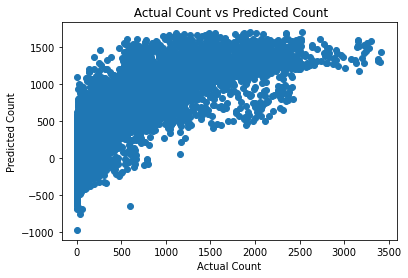

In [127]:
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title(" Actual Count vs Predicted Count")
plt.show()

In [129]:
# prediction on Test data
y_pred = reg.predict(x_test)
error_score = metrics.r2_score(y_test, y_pred)
print("R squared Error : ", error_score)

R squared Error :  0.5336853117766791


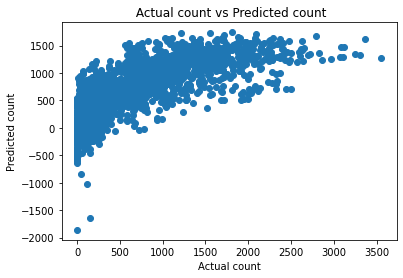

In [130]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual count")
plt.ylabel("Predicted count")
plt.title(" Actual count vs Predicted count")
plt.show()

#Lasso Regression

In [135]:
lass_reg_model = Lasso()
lass_reg_model.fit(x_train,y_train)
y_pred = lass_reg_model.predict(x_train)# prediction on Training data
error_score = metrics.r2_score(y_train,y_pred )
print("R squared Error : ", error_score)

R squared Error :  0.556618979485445


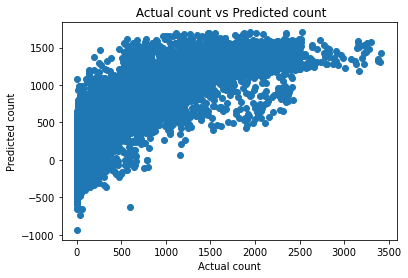

In [136]:
#Visualize the actual prices and Predicted prices
plt.scatter(y_train,y_pred)
plt.xlabel("Actual count")
plt.ylabel("Predicted count")
plt.title(" Actual count vs Predicted count")
plt.show()

In [139]:
#traning on test data
y_pred = lass_reg_model.predict(x_test)
error_score = metrics.r2_score(y_test,y_pred )
print("R squared Error : ", error_score)

R squared Error :  0.5336791904882356


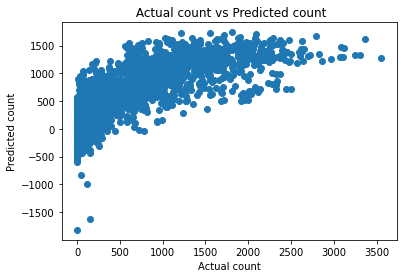

In [140]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual count")
plt.ylabel("Predicted count")
plt.title(" Actual count vs Predicted count")
plt.show()

#Ramdom Forest

In [147]:
RF = RandomForestRegressor(n_estimators=200, random_state=0)
model = RF.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For random forest
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print('r2' ,r2)


RMLSE for the data: 0.6754587843356997
MAE 122.89551141552514
RMSE 5.339257007259807
r2 0.8939079007496828


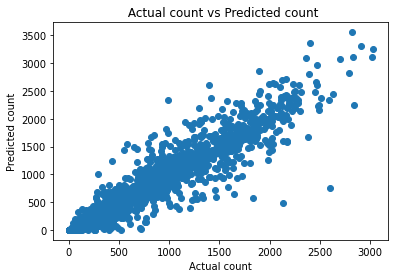

In [148]:
#Visualize the actual prices and Predicted prices
plt.scatter(y_pred,y_test)
plt.xlabel("Actual count")
plt.ylabel("Predicted count")
plt.title(" Actual count vs Predicted count")
plt.show()

#Decision Tree Regressor

In [154]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For decision tree
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print('r2' ,r2)

RMLSE for the data: 0.6171007755753692
MAE 159.96164383561643
RMSE 5.666095056251233
r2 0.796027807004879


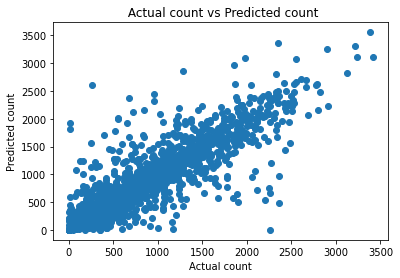

In [155]:
plt.scatter(y_pred,y_test)
plt.xlabel("Actual count")
plt.ylabel("Predicted count")
plt.title(" Actual count vs Predicted count")
plt.show()

#Conclusion

1) R squared Error of linear regression is-0.53

2)R squared Error of lasso regression is-0.53

3)R squared Error of random forest regressor is- 0.89

4)R squared Error of Decision tree  is-0.79

5) Random forest is performing good as compared to other 🥰

THANK YOU